# Implementacja

### Importowanie bibliotek i własnego generatora

In [280]:

# from custom_random import rand
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

from generator import Generator

### Zmienne Stałe, Globalne

#### Parametry sygnału i zakres

In [281]:

CZAS_TRWANIA = 10  # sekundy
CZESTOTLIWOSC_PROBKOWANIA = 10000  # Hz

ZAKRES = (5, 10) # Liczby rzeczywiste

#### Obliczanie czasu trawania i generowanie szumu białego

In [282]:

LICZBA_PROBEK = CZAS_TRWANIA * CZESTOTLIWOSC_PROBKOWANIA
print(f"Liczba próbek {LICZBA_PROBEK}")

#Stwórz obiket Generator
gen = Generator()
szum_bialy = gen.uniform(ZAKRES[0], ZAKRES[1], LICZBA_PROBEK)

# Gotowy generator
#szum_bialy = np.random.uniform(ZAKRES[0], ZAKRES[1], LICZBA_PROBEK)

Liczba próbek 100000


### Wykresy

#### Wykres czasowy szumu białego o rozkładzie równomiernym

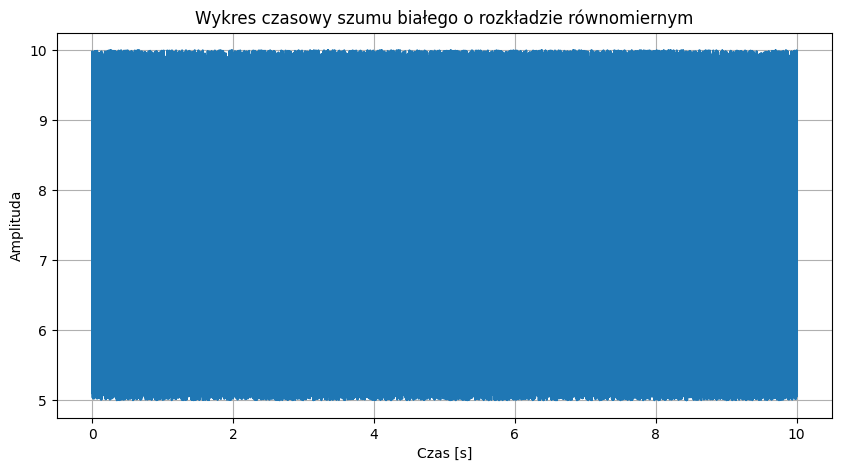

In [283]:

czas = np.linspace(0, CZAS_TRWANIA, LICZBA_PROBEK)
plt.figure(figsize=(10, 5))
plt.plot(czas, szum_bialy)
plt.title('Wykres czasowy szumu białego o rozkładzie równomiernym')
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()

### Przybliżony wykres czasowy szumu białego

Liczba próbek 100


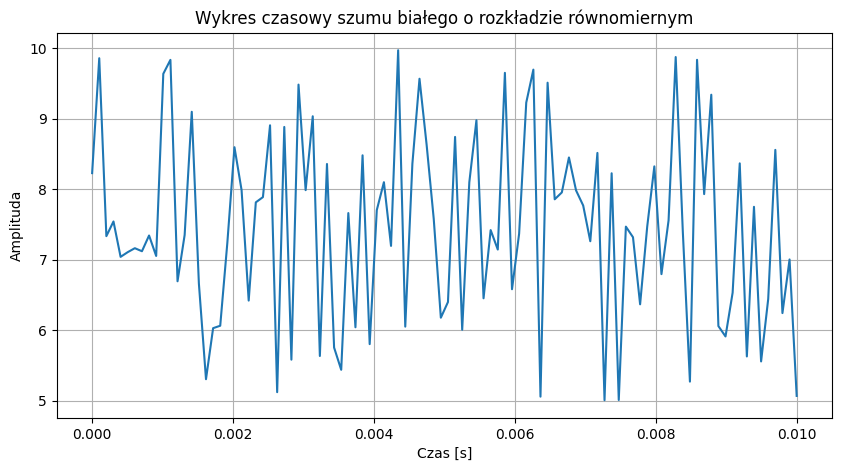

In [284]:

MALY_CZAS_TRWANIA = 0.01
MALA_LICZBA_PROBEK = int(MALY_CZAS_TRWANIA * CZESTOTLIWOSC_PROBKOWANIA)
print(f"Liczba próbek {MALA_LICZBA_PROBEK}")

maly_szum = gen.uniform(ZAKRES[0], ZAKRES[1], MALA_LICZBA_PROBEK)

maly_czas = np.linspace(0, MALY_CZAS_TRWANIA, MALA_LICZBA_PROBEK)
plt.figure(figsize=(10, 5))
plt.plot(maly_czas, maly_szum)
plt.title('Wykres czasowy szumu białego o rozkładzie równomiernym')
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()

### Histogram

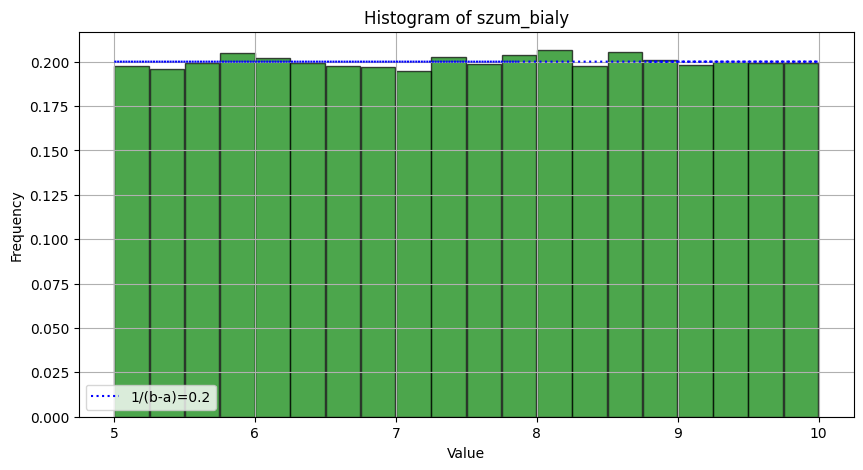

In [285]:
plt.figure(figsize=(10, 5))

x = np.linspace(ZAKRES[0], ZAKRES[1], 100)
plt.plot(szum_bialy, uniform.pdf(szum_bialy, loc=ZAKRES[0], scale=ZAKRES[1]-ZAKRES[0]), 'b', linestyle='dotted', label=f'1/(b-a)={1/(ZAKRES[1]-ZAKRES[0])}')


plt.hist(szum_bialy, bins=20, density=True, rwidth=0.98, color='g', edgecolor='black', alpha=0.7)
plt.title('Histogram of szum_bialy')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


### Gęstość prawdopodobieństwa

In [286]:
#x = np.linspace(ZAKRES[0], ZAKRES[1], 100)
#plt.plot(szum_bialy, uniform.pdf(szum_bialy, loc=ZAKRES[0], scale=ZAKRES[1]-ZAKRES[0]), 'b', label='1/(b-a)')
# Dodanie linii przerywanych na początku i końcu
#plt.vlines(ZAKRES[0], 0, uniform.pdf(ZAKRES[0], loc=ZAKRES[0], scale=ZAKRES[1] - ZAKRES[0]), colors='gray', linestyles='dashed')
#plt.vlines(ZAKRES[1], 0, uniform.pdf(ZAKRES[1], loc=ZAKRES[0], scale=ZAKRES[1] - ZAKRES[0]), colors='gray', linestyles='dashed')

#plt.legend()
#plt.grid(True)
#plt.show()

### Obliczanie dystrybuanty


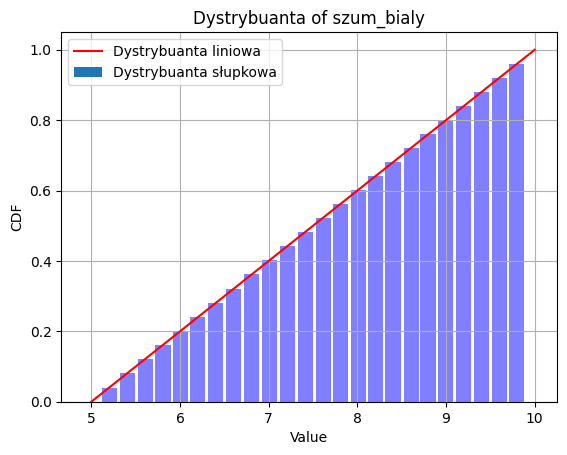

In [287]:
def wykresy_dystrybuanty(szum_bialy, liczba_slupkow=10, szerokosc_slupka=0.90):
    '''
    Funkcja generuje wykresy dystrybuanty dla szumu białego.
    :param szum_bialy: wygenerowany wcześniej szum biały
    :param liczba_slupkow: liczba słupków, domyślnie 10
    :param szerokosc_slupka: szerokość słupka, w przedziale 0.0 - 1.0 (domyślnie 0.9)
    :return: brak
    '''
    
    # Obliczanie dystrybuanty
    cdf_values = uniform.cdf(szum_bialy, loc=ZAKRES[0], scale=ZAKRES[1] - ZAKRES[0])
    
    # Obliczanie kroku dla słupków X
    ilosc_probek = len(szum_bialy)
    krok = int(ilosc_probek / liczba_slupkow)
 
    # Sortowanie danych
    sorted_data = np.sort(szum_bialy)
    sorted_cdf = np.sort(cdf_values)
    
    # Obliczanie szerokości słupków
    width = (sorted_data[krok] - sorted_data[0]) * szerokosc_slupka  # 80% szerokości między pierwszym a drugim słupkiem
 
    # Tworzenie wykresu słupkowego dystrybuanty
    for i in range(0, LICZBA_PROBEK, krok):
        plt.bar(sorted_data[i], sorted_cdf[i], width=width, color='b', alpha=0.5)
        
    # Dodanie labela dla wszystkich słupków
    plt.bar([], [], color='b', alpha=0.5, label='Dystrybuanta słupkowa')
 
    # Tworzenie wykresu liniowego dla dystrybuanty
    plt.plot(sorted_data, sorted_cdf, 'r', label='Dystrybuanta liniowa')
    
    plt.title('Dystrybuanta of szum_bialy')
    plt.xlabel('Value')
    plt.ylabel('CDF')
    plt.legend()
    plt.grid(True)
    plt.show()

wykresy_dystrybuanty(szum_bialy=szum_bialy, liczba_slupkow=25, szerokosc_slupka=0.85)

[0, 0.0760755883177845, 0.12652435388175784, 0.17610618002239256, 0.22527065932181878, 0.27530791086154466, 0.3256532055491786, 0.3767793888641925, 0.427729051955477, 0.47761492436971587, 0.527885471636012, 0.5773952710864735, 0.6258263831872306, 0.6755109414423232, 0.725916998173268, 0.7742586908357144, 0.8246458461412276, 0.8746644569525204, 0.9248502673153025, 1]



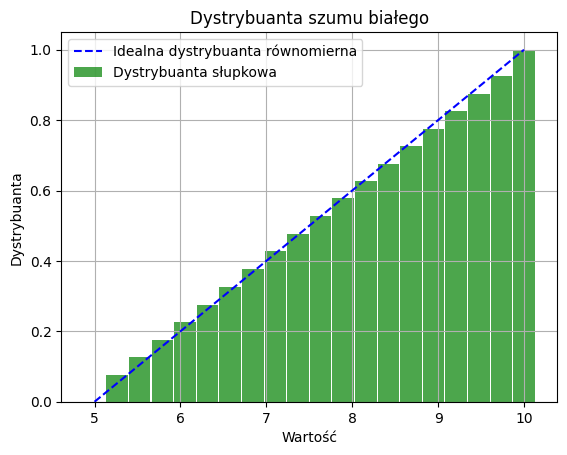

In [288]:
def avg(lst):
    return sum(lst) / len(lst)

def dystrybuanta_slupkowa(lista_probek, zakres, ilosc_slupkow=20):
    '''
    Funkcja generuje wykres dystrybuanty słupkowej dla szumu białego.
    :param ilosc_slupkow: liczba słupków, domyślnie 20
    '''
    probki = np.sort(lista_probek)
    
    # Obliczanie dystrybuanty
    cdf_values = uniform.cdf(probki, loc=zakres[0], scale=zakres[1] - zakres[0])
    sorted_cdf = np.sort(cdf_values)
    
    krok = int(len(probki) / ilosc_slupkow)
    
    # Obliczanie wartości dystrybuanty w środkach słupków
    wartosci_dystrybuanty = [avg(sorted_cdf[i:i+krok]) for i in range(0, len(sorted_cdf)-krok, krok)]
    if len(wartosci_dystrybuanty) < ilosc_slupkow:
        wartosci_dystrybuanty.append(1)
    else:
        wartosci_dystrybuanty[-1] = 1  # Ustawienie ostatniej wartości na 1
    wartosci_dystrybuanty[0] =0
    print(wartosci_dystrybuanty)
    
    print()
    # Tworzenie wykresu słupkowego dystrybuanty
    plt.bar(np.linspace(zakres[0], zakres[1], ilosc_slupkow), wartosci_dystrybuanty, width=(zakres[1] - zakres[0]) / ilosc_slupkow, color='g', alpha=0.7, label='Dystrybuanta słupkowa')
    
    # Dodanie referencyjnej, kropkowanej linii dla idealnej dystrybuanty dla rozkładu równomiernego
    idealne_probki = np.linspace(zakres[0], zakres[1], 1000)
    idealna_dystrybuanta = uniform.cdf(idealne_probki, loc=zakres[0], scale=zakres[1] - zakres[0])
    plt.plot(idealne_probki, idealna_dystrybuanta, 'b--', label='Idealna dystrybuanta równomierna')
        
    plt.title('Dystrybuanta szumu białego')
    plt.xlabel('Wartość')
    plt.ylabel('Dystrybuanta')
    plt.legend()
    plt.grid(True)
    plt.show()

#Stwórz obiket Generator
gen = Generator()
dystrybuanta_slupkowa(szum_bialy, ZAKRES, 20)


[0, 0.05050458080969184, 0.08452869739735815, 0.1180986585730231, 0.1516701180378266, 0.1841323985457925, 0.2169198614955517, 0.2501897696352168, 0.28368341554247234, 0.3171743426308015, 0.3511579132003527, 0.38521049067726365, 0.4191480021303356, 0.4529022752286074, 0.48582950341068376, 0.5194631090232471, 0.5527913849105492, 0.5855034166799318, 0.6176598054650357, 0.6503815119408725, 0.6837710536201281, 0.7178880300612869, 0.7496346356381924, 0.7825193748964692, 0.8162202766556564, 0.8496390875792157, 0.8828499996440773, 0.916437746004545, 0.9496122740754659, 1]


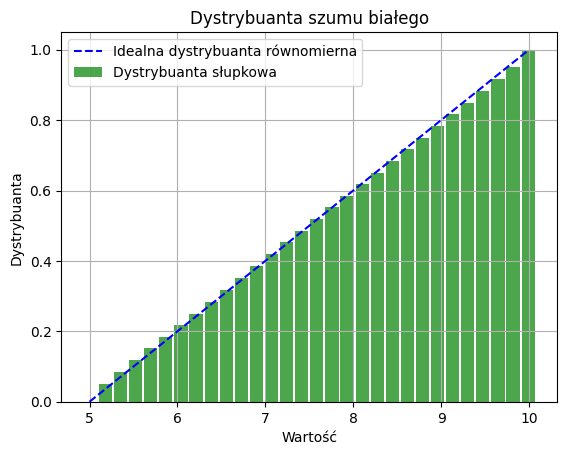

In [301]:
def dystrybuanta_slupkowa(lista_probek, zakres, ilosc_slupkow=20):
    '''
    Funkcja generuje wykres dystrybuanty słupkowej dla szumu białego.
    :param ilosc_slupkow: liczba słupków, domyślnie 20
    '''
    probki = np.sort(lista_probek)
    
    # Obliczanie dystrybuanty
    cdf_values = uniform.cdf(probki, loc=zakres[0], scale=zakres[1] - zakres[0])
    sorted_cdf = np.sort(cdf_values)
    
    krok = len(probki) // ilosc_slupkow
    
    # Obliczanie wartości dystrybuanty w środkach słupków
    wartosci_dystrybuanty = [avg(sorted_cdf[i:i+krok]) for i in range(0, len(sorted_cdf)-krok, krok)]
    if len(wartosci_dystrybuanty) < ilosc_slupkow:
        wartosci_dystrybuanty.append(1)
    else:
        wartosci_dystrybuanty[-1] = 1  # Ustawienie ostatniej wartości na 1
    wartosci_dystrybuanty[0] = 0
    print(wartosci_dystrybuanty)
    
    # Tworzenie wykresu słupkowego dystrybuanty
    plt.bar(np.linspace(zakres[0]+0.01, zakres[1]-0.01, ilosc_slupkow), wartosci_dystrybuanty, width=0.15, color='g', alpha=0.7, label='Dystrybuanta słupkowa')
    
    # Dodanie referencyjnej, kropkowanej linii dla idealnej dystrybuanty dla rozkładu równomiernego
    idealne_probki = np.linspace(zakres[0], zakres[1], 1000)
    idealna_dystrybuanta = uniform.cdf(idealne_probki, loc=zakres[0], scale=zakres[1] - zakres[0])
    plt.plot(idealne_probki, idealna_dystrybuanta, 'b--', label='Idealna dystrybuanta równomierna')
        
    plt.title('Dystrybuanta szumu białego')
    plt.xlabel('Wartość')
    plt.ylabel('Dystrybuanta')
    plt.legend()
    plt.grid(True)
    plt.show()

# Wywołanie funkcji
dystrybuanta_slupkowa(szum_bialy, ZAKRES, 30)

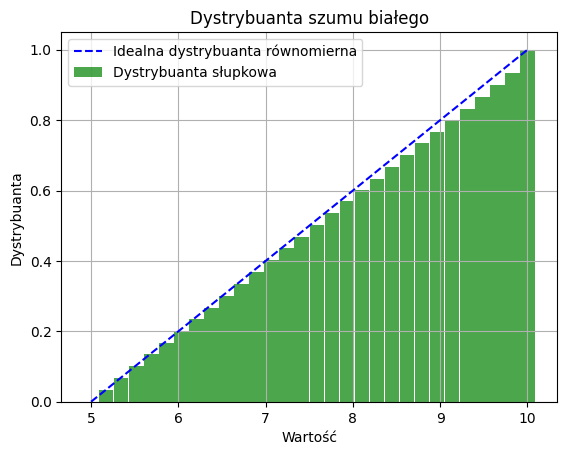

In [304]:
def dystrubunta_slupkowa(lista_probek, zakres, ilosc_slupkow=20):
    '''
    Funkcja generuje wykres dystrybuanty słupkowej dla szumu białego.
    :param ilosc_slupkow: liczba słupków, domyślnie 20
    '''
    probki = np.sort(lista_probek)
    
    # Obliczanie dystrybuanty
    cdf_values = uniform.cdf(probki, loc=zakres[0], scale=zakres[1] - zakres[0])
    sorted_cdf = np.sort(cdf_values)
    
    krok = int(len(probki) / ilosc_slupkow)
    
    # Tworzenie wykresu słupkowego dystrybuanty
    plt.plot(probki[::krok], sorted_cdf[::krok], 'r', label='Dystrybuanta liniowa')
    
    # Dodanie referencyjnej, kropkowanej linii dla idealnej dystrybuanty dla rozkładu równomiernego
    idealne_probki = np.linspace(zakres[0], zakres[1], 1000)
    idealna_dystrybuanta = uniform.cdf(idealne_probki, loc=zakres[0], scale=zakres[1] - zakres[0])
    plt.plot(idealne_probki, idealna_dystrybuanta, 'b--', label='Idealna dystrybuanta równomierna')
        
    plt.title('Dystrybuanta szumu białego')
    plt.xlabel('Value')
    plt.ylabel('CDF')
    plt.legend()
    plt.grid(True)
    plt.show()


# Wywołanie funkcji
dystrybuanta_slupkowa(szum_bialy, ZAKRES, 30)